In [1]:
import os
# import shutil
import utilities as rocku
import matplotlib.pyplot as plt
# import tomopy
import numpy as np
# import pandas as pd
import pprint
import dxchange
import multiprocessing as mp
import timeit

In [2]:
ncore = mp.cpu_count()
ncore

48

In [3]:
# need to change
ipts="30750"
# scan_type = 'ct_scans'
# scan_type = 'radiographs'
# scan_type = 'processed_data'

In [4]:
scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/normalized"# + scan_type
os.listdir(scan_loc)

['2023_06_10_high_res_discharge',
 '2023_06_09_highres_NMC_normalized',
 '2023_06_09_highres_NMC']

In [5]:
scan_dir = os.path.join(scan_loc, "2023_06_09_highres_NMC")
fname_list = os.listdir(scan_dir)
# fname_list.pop(0)
fname_list.sort()
fname_list

['charge_0120_1187.tiff',
 'charge_0120_1188.tiff',
 'charge_0120_1189.tiff',
 'charge_0120_1190.tiff',
 'charge_0120_1191.tiff',
 'charge_0120_1192.tiff',
 'charge_0120_1193.tiff',
 'charge_0120_1194.tiff',
 'charge_0120_1195.tiff',
 'charge_0120_1196.tiff',
 'charge_0120_1197.tiff',
 'charge_0120_1198.tiff',
 'charge_0120_1199.tiff',
 'charge_0120_1200.tiff',
 'charge_0120_1201.tiff',
 'charge_0120_1202.tiff',
 'charge_0120_1203.tiff',
 'charge_0120_1204.tiff',
 'charge_0120_1205.tiff',
 'charge_0120_1206.tiff',
 'charge_0120_1207.tiff',
 'charge_0120_1208.tiff',
 'charge_0120_1209.tiff',
 'charge_0120_1210.tiff',
 'charge_0120_1211.tiff',
 'charge_0120_1212.tiff',
 'charge_0120_1213.tiff',
 'charge_0120_1214.tiff',
 'charge_0120_1215.tiff',
 'charge_0120_1216.tiff',
 'charge_0120_1217.tiff',
 'charge_0120_1218.tiff',
 'charge_0120_1219.tiff',
 'charge_0120_1220.tiff',
 'charge_0120_1221.tiff',
 'charge_0120_1222.tiff',
 'charge_0120_1223.tiff',
 'charge_0120_1224.tiff',
 'charge_012

In [7]:
raw = rocku.read_tiff_stack(scan_dir, [fname_list[-1], fname_list[-11]])

2it [00:00,  9.28it/s]


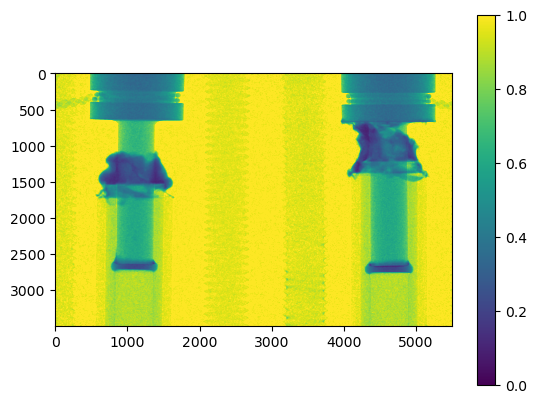

In [8]:
plt.imshow(raw[0], vmin=0, vmax=1)
plt.colorbar()
plt.show()

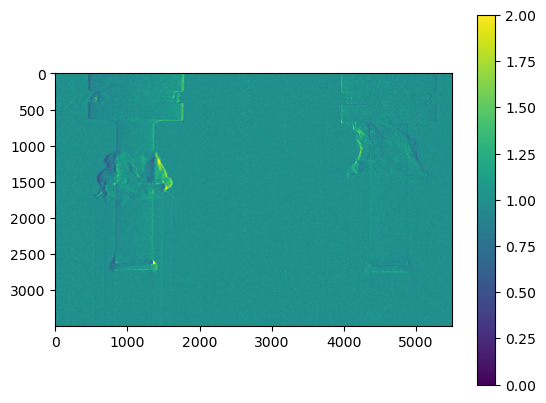

In [9]:
plt.imshow(raw[-1]/raw[0], vmin=0, vmax=2)
plt.colorbar()
plt.show()

Alignment ROI:


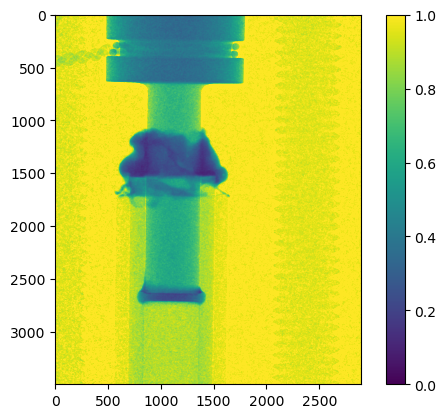

In [10]:
###################### need to change start
roi = True
# crop_left = 250
# crop_right = 1650
# crop_top = 750
# crop_bottom = 1950
roi_left = 0
roi_right = 2900
roi_top = 0
roi_bottom = 3500
###################### need to change end
raw_roi = rocku.crop(raw, roi_left, roi_right, roi_top, roi_bottom, roi)
# moved_roi = rocku.crop(moved, roi_left, roi_right, roi_top, roi_bottom, roi)
print("Alignment ROI:")
plt.imshow(raw_roi[0], vmin=0, vmax=1)
plt.colorbar()
plt.show()
# crop_roi_dict = {
#     'left': crop_left,
#     'right': crop_right,
#     'top': crop_top,
#     'bottom': crop_bottom
# }

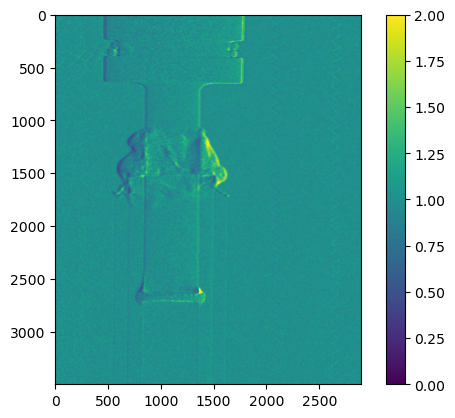

In [11]:
plt.imshow(raw_roi[-1]/raw_roi[0], vmin=0, vmax=2)
plt.colorbar()
plt.show()

In [12]:
import skimage as sk

In [13]:
sk.transform.estimate_transform('similarity', raw_roi[-1], raw_roi[0])

<SimilarityTransform(matrix=
    [[ 1.87712458e-01, -1.83483860e-02,  6.40226075e-04, ..., -7.10592174e-03,
       5.69090249e-04,  4.51904131e-01],
     [-3.00847490e-02,  2.17328814e-01, -1.99417711e-02, ..., -4.87158724e-04,
       9.73349080e-03, -1.32216059e+00],
     [-1.14917770e-02, -2.26340323e-02,  2.18584359e-01, ..., -5.41176990e-04,
       3.22125771e-02, -5.92966588e-01],
     ...,
     [ 3.45180039e-02, -1.61551684e-02, -1.55748098e-02, ...,  2.00779425e-01,
      -1.16429413e-02,  1.25707066e+00],
     [ 1.59576568e-02, -1.33739059e-02, -1.96185394e-02, ..., -1.42403634e-02,
       2.31260798e-01,  4.65773719e-01],
     [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,  0.00000000e+00,
       0.00000000e+00,  1.00000000e+00]]) at 0x7f61ad0d7340>

In [42]:
import TXM_Sandbox.utils.reg_algs as regu

In [43]:
regu.cost_norm(stk_roi[0], stk_roi[1], type='tv')

0.007282811691857582

In [47]:
regu.cost_norm(stk_roi[0], stk_roi[1], type='de')

0.003932745619749366

In [48]:
regu.cost_abs(stk_roi[0], stk_roi[1], type='de')

39972.42

In [50]:
regu.cost_abs(stk_roi[0], stk_roi[1], type='tv')

80377.8039880991

In [46]:
regu.reg_stack(stk_roi,"MRTV_REG")

NameError: name 'mp' is not defined